# Dataset

In [25]:
import pandas as pd
import numpy as np
from datetime import datetime
import re

df = pd.read_csv("original_dataset.csv")

# Clean Data

In [24]:
def clean_data(df):
    """
    Clean the customer dataset by performing various data cleaning operations.
    
    Parameters:
    df (pd.DataFrame): Input dataframe to clean
    
    Returns:
    pd.DataFrame: Cleaned dataframe
    """
    # Create a copy to avoid modifying the original
    df_clean = df.copy()
    
    # 1. Handle missing values
    print("Checking for missing values...")
    print(df_clean.isnull().sum())
    
    # Fill missing values appropriately
    df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
    df_clean['Gender'] = df_clean['Gender'].fillna('Unknown')
    df_clean['Purchase_Amount'] = df_clean['Purchase_Amount'].fillna(0)
    df_clean['Feedback_Score'] = df_clean['Feedback_Score'].fillna(df_clean['Feedback_Score'].median())
    
    # 2. Remove duplicates
    print("\nChecking for duplicates...")
    duplicates = df_clean.duplicated().sum()
    print(f"Found {duplicates} duplicate rows")
    df_clean = df_clean.drop_duplicates()
    
    # 3. Clean text fields
    print("\nCleaning text fields...")
    # Clean names
    df_clean['Name'] = df_clean['Name'].str.strip()
    
    # Clean email addresses
    df_clean['Email'] = df_clean['Email'].str.lower().str.strip()
    
    # Clean phone numbers
    df_clean['Phone_Number'] = df_clean['Phone_Number'].apply(lambda x: re.sub(r'\D', '', str(x)) if pd.notnull(x) else x)
    
    # Clean addresses
    df_clean['Address'] = df_clean['Address'].str.strip()
    
    # 4. Standardize categorical variables
    print("\nStandardizing categorical variables...")
    df_clean['Gender'] = df_clean['Gender'].str.capitalize()
    df_clean['Preferred_Payment_Method'] = df_clean['Preferred_Payment_Method'].str.title()
    df_clean['Loyalty_Member'] = df_clean['Loyalty_Member'].str.capitalize()
    
    # 5. Convert date column to datetime
    df_clean['Last_Purchase_Date'] = pd.to_datetime(df_clean['Last_Purchase_Date'], errors='coerce')
    
    # 6. Check for outliers in numerical columns
    print("\nChecking for outliers...")
    numerical_cols = ['Age', 'Purchase_Amount', 'Feedback_Score']
    for col in numerical_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        print(f"Found {len(outliers)} outliers in {col}")
    
    return df_clean
def main():
    # Read the dataset
    df = pd.read_csv("original_dataset.csv")
    
    # Clean the data
    df_clean = clean_data(df)
    
    # Save cleaned dataset
    df_clean.to_csv("cleaned_dataset.csv", index=False)
    print("\nCleaned dataset saved as 'cleaned_dataset.csv'")
    
    # Display basic information about the cleaned dataset
    print("\nCleaned Dataset Information:")
    print(f"Shape: {df_clean.shape}")
    print("\nData Types:")
    print(df_clean.dtypes)
    print("\nFirst few rows of cleaned data:")
    print(df_clean.head())

if __name__ == "__main__":
    main()

Checking for missing values...
Customer_ID                  0
Name                         0
Age                          0
Gender                       0
Email                        0
Phone_Number                11
Address                      0
Purchase_Amount              0
Last_Purchase_Date           0
Preferred_Payment_Method     0
Feedback_Score               0
Loyalty_Member               0
dtype: int64

Checking for duplicates...
Found 0 duplicate rows

Cleaning text fields...

Standardizing categorical variables...

Checking for outliers...
Found 0 outliers in Age
Found 0 outliers in Purchase_Amount
Found 0 outliers in Feedback_Score

Cleaned dataset saved as 'cleaned_dataset.csv'

Cleaned Dataset Information:
Shape: (100, 12)

Data Types:
Customer_ID                         object
Name                                object
Age                                  int64
Gender                              object
Email                               object
Phone_Number            

# Exploratory data analysis

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys


Basic Statistics:
              Age  Phone_Number  Purchase_Amount   Last_Purchase_Date  \
count  100.000000  8.900000e+01       100.000000                  100   
mean    47.300000  1.554996e+14       496.472600  2022-11-03 20:52:48   
min     18.000000  2.084288e+08        26.580000  2020-01-30 00:00:00   
25%     28.750000  7.873165e+09       248.350000  2021-08-06 00:00:00   
50%     48.000000  6.429637e+12       515.220000  2023-01-15 12:00:00   
75%     62.000000  1.158988e+14       728.615000  2024-02-15 18:00:00   
max     80.000000  1.908856e+15       986.200000  2025-03-12 00:00:00   
std     18.822671  3.482682e+14       281.992566                  NaN   

       Feedback_Score  
count      100.000000  
mean         2.960000  
min          1.000000  
25%          2.000000  
50%          3.000000  
75%          4.000000  
max          5.000000  
std          1.377452  


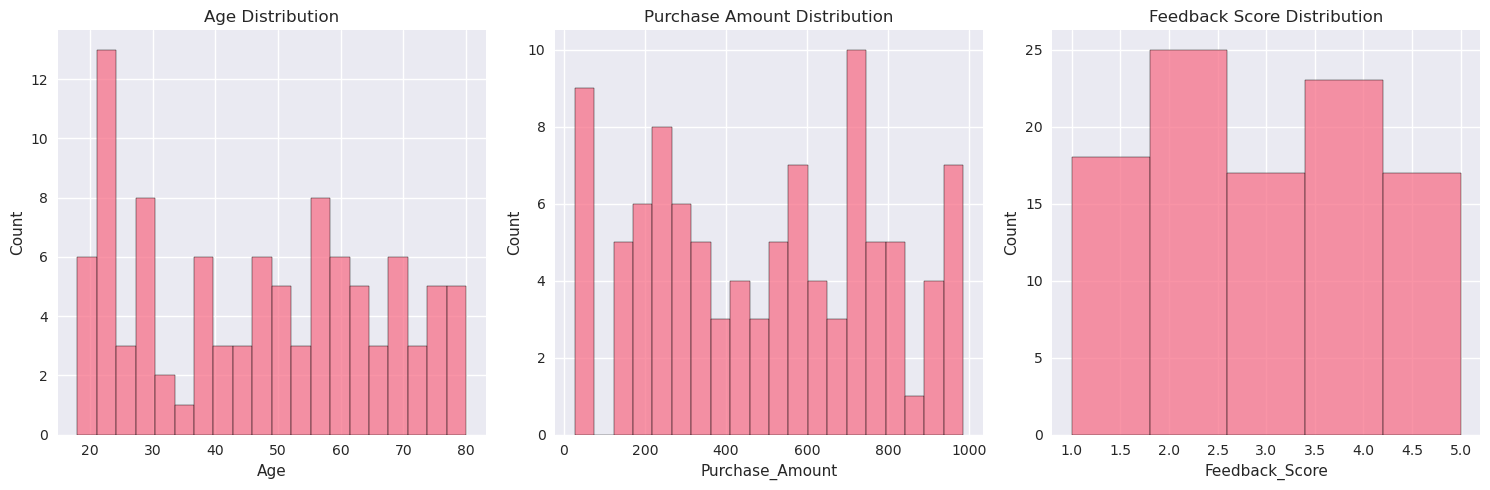

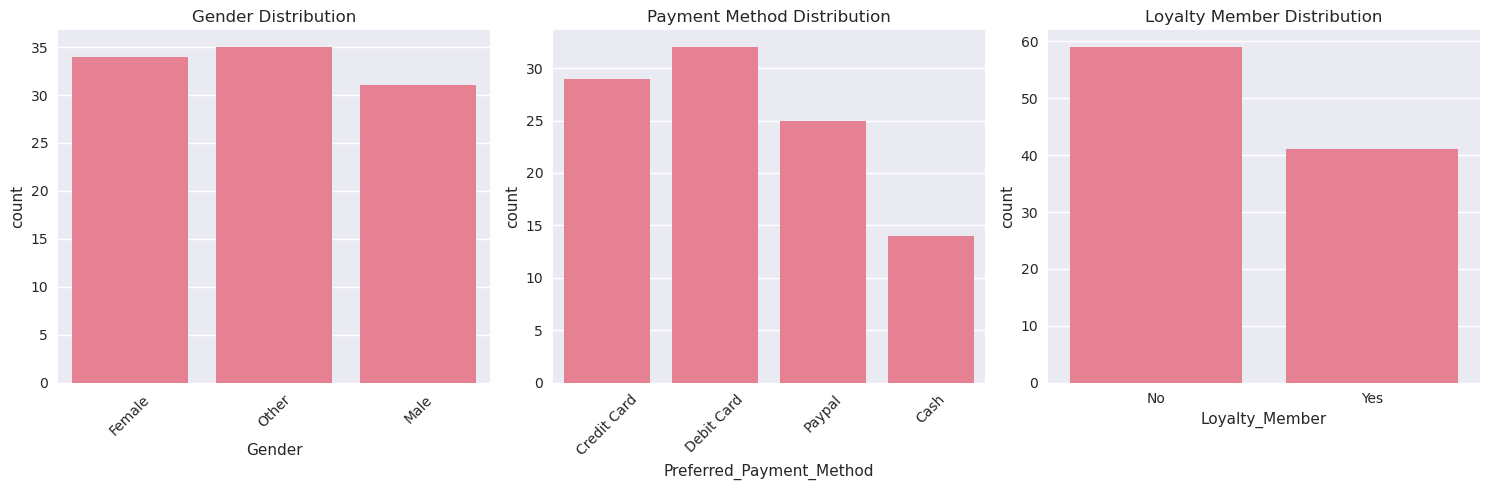

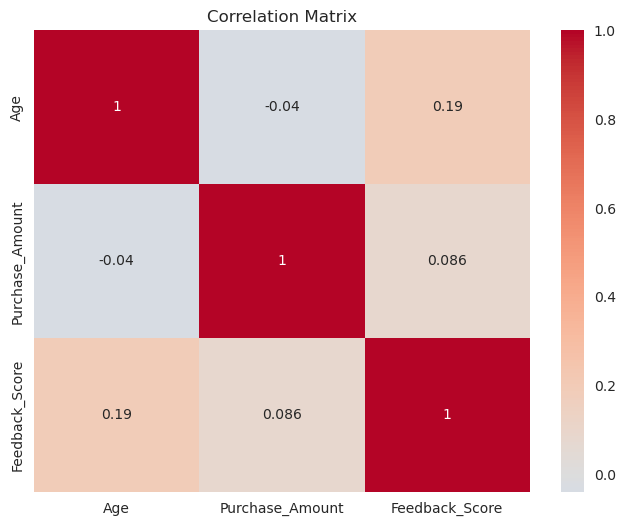

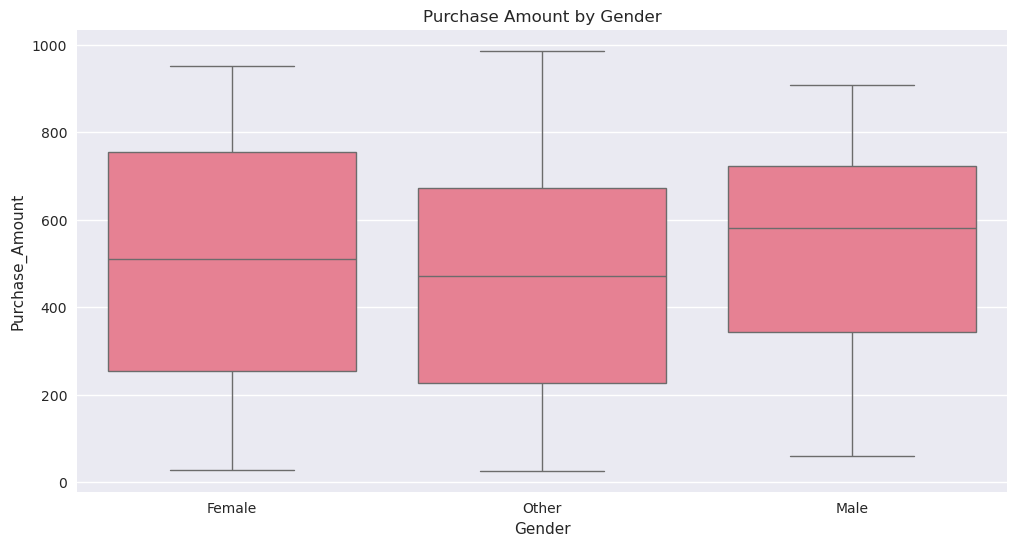

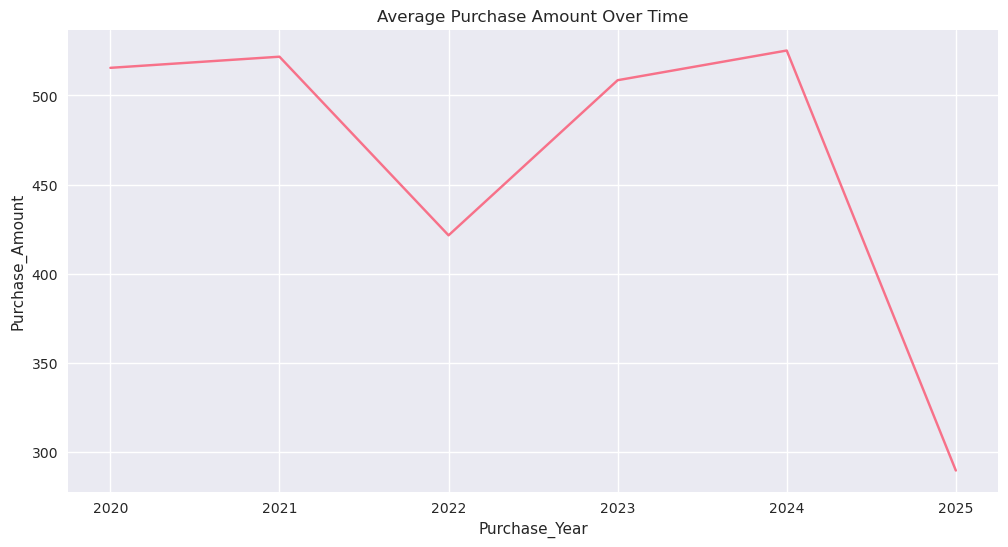


Additional Insights:

Total number of customers: 100

Average purchase amount: $496.47

Percentage of loyalty members: 41.0%

Most common payment method: Debit Card

Average feedback score: 3.0


In [32]:
try:
    # Read the cleaned dataset
    df = pd.read_csv('cleaned_dataset.csv')
    
    # Convert columns to appropriate data types
    df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'], errors='coerce')
    df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce')
    df['Feedback_Score'] = pd.to_numeric(df['Feedback_Score'], errors='coerce')
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    
    # Set style for better visualization
    plt.style.use('seaborn-v0_8')
    sns.set_palette('husl')
    
    # 1. Basic Statistics
    print('\nBasic Statistics:')
    print(df.describe())
    
    # 2. Distribution of Numerical Variables
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x='Age', bins=20)
    plt.title('Age Distribution')
    
    plt.subplot(1, 3, 2)
    sns.histplot(data=df, x='Purchase_Amount', bins=20)
    plt.title('Purchase Amount Distribution')
    
    plt.subplot(1, 3, 3)
    sns.histplot(data=df, x='Feedback_Score', bins=5)
    plt.title('Feedback Score Distribution')
    plt.tight_layout()
    plt.show()
    
    # 3. Categorical Variables Analysis
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.countplot(data=df, x='Gender')
    plt.title('Gender Distribution')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 3, 2)
    sns.countplot(data=df, x='Preferred_Payment_Method')
    plt.title('Payment Method Distribution')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 3, 3)
    sns.countplot(data=df, x='Loyalty_Member')
    plt.title('Loyalty Member Distribution')
    plt.tight_layout()
    plt.show()
    
    # 4. Correlation Analysis
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[['Age', 'Purchase_Amount', 'Feedback_Score']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()
    
    # 5. Purchase Amount by Category
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Gender', y='Purchase_Amount')
    plt.title('Purchase Amount by Gender')
    plt.show()
    
    # 6. Time-based Analysis
    df['Purchase_Year'] = df['Last_Purchase_Date'].dt.year
    df['Purchase_Month'] = df['Last_Purchase_Date'].dt.month
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df.groupby('Purchase_Year')['Purchase_Amount'].mean().reset_index(),
                 x='Purchase_Year', y='Purchase_Amount')
    plt.title('Average Purchase Amount Over Time')
    plt.show()
    
    # 7. Additional Insights
    print('\nAdditional Insights:')
    print(f"\nTotal number of customers: {len(df)}")
    print(f"\nAverage purchase amount: ${df['Purchase_Amount'].mean():.2f}")
    print(f"\nPercentage of loyalty members: {(df['Loyalty_Member'] == 'Yes').mean()*100:.1f}%")
    print(f"\nMost common payment method: {df['Preferred_Payment_Method'].mode()[0]}")
    print(f"\nAverage feedback score: {df['Feedback_Score'].mean():.1f}")

except FileNotFoundError:
    print("Error: cleaned_dataset.csv file not found. Please make sure the file exists in the current directory.")
    sys.exit(1)
except pd.errors.EmptyDataError:
    print("Error: The dataset file is empty.")
    sys.exit(1)
except Exception as e:
    print(f"An error occurred: {str(e)}")
    sys.exit(1)

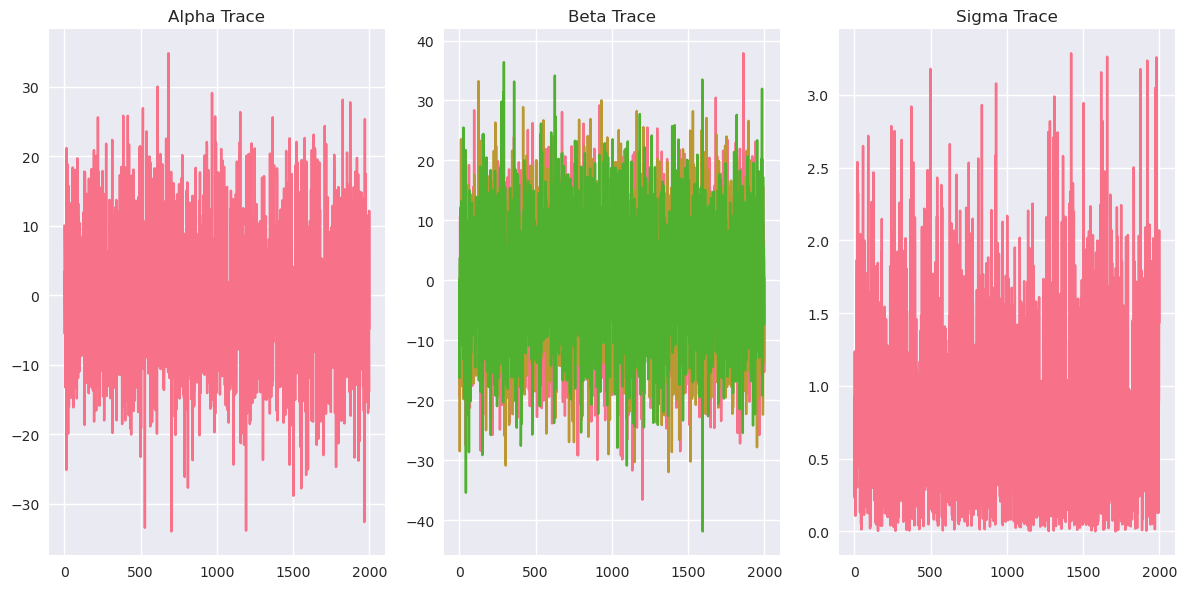

Alpha: Mean = 0.0904079673832932, Std = 10.060275494472474
Beta: Mean = [-0.16086059  0.19366386  0.18099715], Std = [10.06889735 10.13488683 10.02116933]
Sigma: Mean = 0.802610803410259, Std = 0.6084017992884744


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')

# Select features and target
X = df[['Age', 'Feedback_Score']].copy()
X['Loyalty_Member'] = df['Loyalty_Member'].map({'Yes': 1, 'No': 0})
y = df['Purchase_Amount']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define prior parameters
alpha_mu = 0  # mean of alpha
alpha_sigma = 10  # standard deviation of alpha

beta_mu = 0  # mean of beta
beta_sigma = 10  # standard deviation of beta

sigma_scale = 1  # scale of the half-normal prior for sigma

# Sample priors
alpha_prior = norm.rvs(loc=alpha_mu, scale=alpha_sigma, size=2000)
beta_prior = norm.rvs(loc=beta_mu, scale=beta_sigma, size=(2000, X_scaled.shape[1]))
sigma_prior = np.abs(norm.rvs(loc=0, scale=sigma_scale, size=2000))  # half-normal

# Reshape alpha_prior to (2000, 1) for broadcasting
alpha_prior_reshaped = alpha_prior[:, np.newaxis]  # Shape: (2000, 1)

# Now, we compute the mu for each posterior sample
# We need to add alpha to each sample's dot product between X_scaled and beta_prior

# The dot product of X_scaled (100, 2) and beta_prior.T (2, 2000) gives (100, 2000)
# Add alpha_prior_reshaped (2000, 1) to it to get the final mu for each posterior sample
mu = np.dot(X_scaled, beta_prior.T) + alpha_prior_reshaped.T  # Shape: (100, 2000)

# Reshape sigma_prior to (100, 2000) to allow broadcasting
sigma_prior_reshaped = sigma_prior[:, np.newaxis]  # Shape: (2000, 1)
sigma_prior_reshaped = np.repeat(sigma_prior_reshaped.T, 100, axis=0)  # Shape: (100, 2000)

# Likelihood function: y ~ Normal(mu, sigma)
y_obs = norm.rvs(loc=mu, scale=sigma_prior_reshaped)  # Shape: (100, 2000)

# Plot results (trace plots for alpha, beta, sigma)
plt.figure(figsize=(12, 6))

# Alpha trace plot
plt.subplot(1, 3, 1)
plt.plot(alpha_prior)
plt.title('Alpha Trace')

# Beta trace plot
plt.subplot(1, 3, 2)
plt.plot(beta_prior)
plt.title('Beta Trace')

# Sigma trace plot
plt.subplot(1, 3, 3)
plt.plot(sigma_prior)
plt.title('Sigma Trace')

plt.tight_layout()
plt.savefig('bayesian_regression_trace.png')
plt.show()

# Print summary statistics for alpha, beta, and sigma
alpha_mean = np.mean(alpha_prior)
alpha_std = np.std(alpha_prior)

beta_mean = np.mean(beta_prior, axis=0)
beta_std = np.std(beta_prior, axis=0)

sigma_mean = np.mean(sigma_prior)
sigma_std = np.std(sigma_prior)

print(f"Alpha: Mean = {alpha_mean}, Std = {alpha_std}")
print(f"Beta: Mean = {beta_mean}, Std = {beta_std}")
print(f"Sigma: Mean = {sigma_mean}, Std = {sigma_std}")

# Save posterior samples as a dictionary
posterior_samples = {
    'alpha': alpha_prior,
    'beta': beta_prior,
    'sigma': sigma_prior
}

# Save the posterior samples
np.save('bayesian_regression_posterior_samples.npy', posterior_samples)
